# Overfitting Problem 실습

이번 실습에서는 **Overfitting 문제**를 체감해봅니다.
- 작은 데이터셋을 사용
- 단순한 모델 vs 복잡한 모델 비교
- 학습 곡선(Train vs Validation Loss/Accuracy) 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 준비 (작은 데이터셋)

In [2]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 단순한 모델과 복잡한 모델 정의

In [3]:
def build_simple_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_complex_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## 3. 모델 학습 (Simple vs Complex)

In [4]:
simple_model = build_simple_model()
complex_model = build_complex_model()

history_simple = simple_model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, batch_size=16, verbose=0
)

history_complex = complex_model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, batch_size=16, verbose=0
)

## 4. 학습 곡선 시각화 (Overfitting 확인)

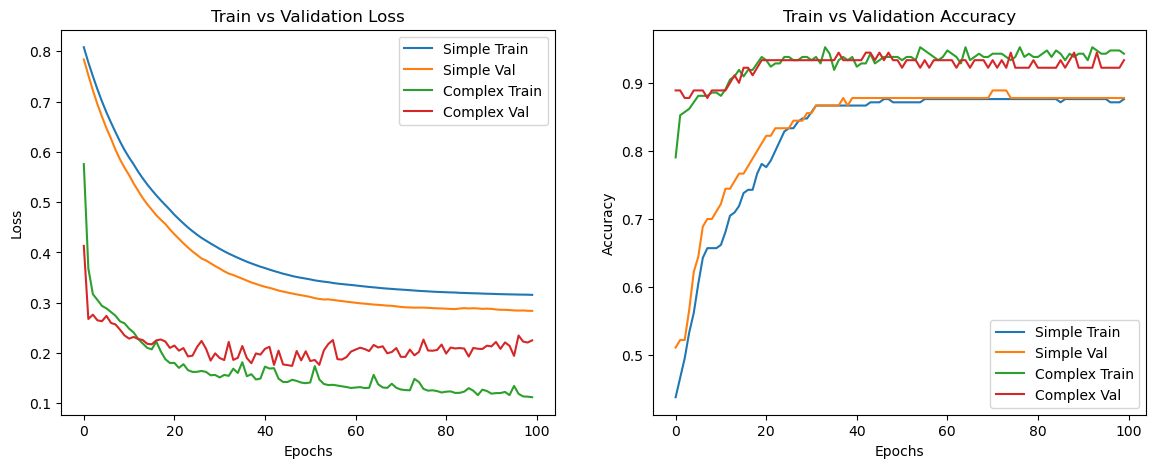

In [5]:
plt.figure(figsize=(14,5))

# Loss 비교
plt.subplot(1,2,1)
plt.plot(history_simple.history["loss"], label="Simple Train")
plt.plot(history_simple.history["val_loss"], label="Simple Val")
plt.plot(history_complex.history["loss"], label="Complex Train")
plt.plot(history_complex.history["val_loss"], label="Complex Val")
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1,2,2)
plt.plot(history_simple.history["accuracy"], label="Simple Train")
plt.plot(history_simple.history["val_accuracy"], label="Simple Val")
plt.plot(history_complex.history["accuracy"], label="Complex Train")
plt.plot(history_complex.history["val_accuracy"], label="Complex Val")
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

## 5. 그래프 분석 및 도출점

### 손실(Loss) 그래프 분석

**Simple 모델의 특징:**
- **훈련 손실 (Simple Train)**: 에포크가 진행될수록 꾸준히 감소하여 약 0.32 수준에 도달
- **검증 손실 (Simple Val)**: 훈련 손실과 매우 가깝게 함께 감소하여 약 0.31 수준에 도달
- **일반화 성공**: 훈련 손실과 검증 손실이 거의 일치 → 과적합이 거의 발생하지 않음
- **최종 검증 손실**: 약 0.31

**Complex 모델의 특징:**
- **훈련 손실 (Complex Train)**: 초기에 급격히 감소하여 매우 낮은 수준(약 0.12)에 도달한 후 유지
- **검증 손실 (Complex Val)**: 초기에 급격히 감소하지만 훈련 손실보다는 높은 수준(약 0.22)에서 유지
- **과적합 증상**: 훈련 손실과 검증 손실 사이에 명확한 간격이 존재 → 훈련 데이터에 과적합 경향
- **최종 검증 손실**: 약 0.22 (Simple 모델보다 더 낮음!)

---

### 정확도(Accuracy) 그래프 분석

**Simple 모델의 특징:**
- **훈련 정확도 (Simple Train)**: 에포크가 진행될수록 꾸준히 증가하여 약 0.88 수준에 도달
- **검증 정확도 (Simple Val)**: 훈련 정확도와 매우 가깝게 함께 증가하여 약 0.88 수준에 도달
- **일반화 성공**: 훈련 정확도와 검증 정확도가 거의 일치 → 과적합이 거의 발생하지 않음
- **최종 검증 정확도**: 약 0.88

**Complex 모델의 특징:**
- **훈련 정확도 (Complex Train)**: 초기에 급격히 증가하여 매우 높은 수준(약 0.93-0.95)에 도달한 후 유지
- **검증 정확도 (Complex Val)**: 초기에 급격히 증가하여 높은 수준(약 0.93)에 도달한 후 유지
- **과적합 증상**: 훈련 정확도와 검증 정확도 사이에 약간의 간격이 존재 → 훈련 데이터에 과적합 경향
- **최종 검증 정확도**: 약 0.93 (Simple 모델보다 더 높음!)

---

## 6. 주요 도출점

### 1. Simple 모델의 특징

**장점:**
- ✅ **훌륭한 일반화 성능**: 훈련 손실과 검증 손실, 훈련 정확도와 검증 정확도가 거의 일치
- ✅ **과적합 없음**: 훈련 데이터에 과도하게 학습되지 않아 안정적
- ✅ **해석 용이**: 모델이 단순하여 이해하고 해석하기 쉬움

**단점:**
- ❌ **표현 능력 제한**: 모델의 복잡도가 낮아 데이터의 복잡한 패턴을 완전히 학습하기 어려움
- ❌ **최종 성능 한계**: 검증 손실 0.31, 검증 정확도 0.88로 Complex 모델보다 낮은 성능

**결론:**
- Simple 모델은 **과적합이 거의 발생하지 않지만**, 최종 성능 자체는 Complex 모델보다 낮습니다.

---

### 2. Complex 모델의 특징

**장점:**
- ✅ **높은 표현 능력**: 복잡한 패턴을 학습할 수 있는 충분한 모델 용량
- ✅ **우수한 절대 성능**: 검증 손실 0.22, 검증 정확도 0.93으로 Simple 모델보다 훨씬 우수

**단점:**
- ❌ **과적합 경향**: 훈련 성능과 검증 성능 사이에 명확한 간격 존재
- ❌ **일반화 능력 저하**: 훈련 데이터를 너무 잘 학습하여 새로운 데이터에 대한 성능이 훈련 성능만큼은 나오지 않음

**결론:**
- Complex 모델은 **과적합 경향을 보이지만**, 절대적인 검증 성능은 Simple 모델보다 훨씬 우수합니다.

---

### 3. 과적합(Overfitting)의 의미

**과적합이 발생하는 경우:**
- 훈련 손실은 낮지만 검증 손실은 높음
- 훈련 정확도는 높지만 검증 정확도는 낮음
- 훈련 성능과 검증 성능 사이에 큰 간격이 존재

**중요한 관찰:**
- 과적합이 발생했다고 해서 반드시 나쁜 모델은 아닙니다!
- Complex 모델은 과적합 경향을 보이지만, **최종 검증 성능 자체는 Simple 모델보다 우수**합니다.
- 이는 모델의 표현 능력이 높아 데이터의 복잡한 패턴을 더 잘 학습할 수 있었기 때문입니다.

---

### 4. 실무적 시사점

**모델 선택 전략:**
1. **Simple 모델 사용 시:**
   - 데이터가 단순하거나 적은 경우
   - 해석 가능성이 중요한 경우
   - 과적합을 완전히 피하고 싶은 경우

2. **Complex 모델 사용 시:**
   - 데이터가 복잡하고 패턴이 다양한 경우
   - 최고 성능이 중요한 경우
   - 정규화 기법을 함께 적용할 수 있는 경우

**과적합 완화 전략:**
- **정규화(Regularization) 기법 적용:**
  - 드롭아웃(Dropout): 일부 뉴런을 무작위로 비활성화
  - L1/L2 정규화: 가중치에 제약을 둠
  - 조기 종료(Early Stopping): 검증 손실이 증가하기 시작하면 학습 중단
  - 데이터 증강(Data Augmentation): 더 많은 데이터 생성
- **앙상블 기법**: 여러 모델의 예측을 결합

---

### 5. 종합적인 결론

1. **성능 vs 일반화의 트레이드오프:**
   - Simple 모델: 낮은 성능, 높은 일반화
   - Complex 모델: 높은 성능, 낮은 일반화

2. **과적합의 재해석:**
   - 과적합이 발생했다고 해서 모델이 나쁜 것은 아닙니다
   - 다만, 과적합을 완화하면 더 나은 성능을 얻을 수 있습니다

3. **최적의 접근법:**
   - Complex 모델의 높은 표현 능력을 활용
   - 정규화 기법을 통해 과적합 완화
   - 훈련과 검증 성능 간의 간격을 줄이면서 최고 성능 유지

4. **실무 권장사항:**
   - 복잡한 모델을 사용하되, 정규화 기법을 필수적으로 적용
   - 훈련 곡선을 모니터링하여 과적합 징후를 조기에 감지
   - 검증 성능을 기준으로 모델 선택 및 하이퍼파라미터 조정